In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df= pd.DataFrame({
    'x':[10,20,28,18,29,33,24,45,45,52,51,52,55,61,64,69,72],
    'y':[39,36,30,52,46,55,59,63,70,66,63,58,23,14,8,7,24]
})
np.random.seed(20import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df= pd.DataFrame({
    'x':[12,20,28,18,29,33,24,45,45,52,51,52,55,61,64,69,72],
    'y':[39,36,30,52,46,55,59,63,70,66,63,58,23,14,8,7,24]
})
np.random.seed(200)
k=30)
k=3

In [21]:
df['x']

0     12
1     20
2     28
3     18
4     29
5     33
6     24
7     45
8     45
9     52
10    51
11    52
12    55
13    61
14    64
15    69
16    72
Name: x, dtype: int64

In [22]:
k=3
centroids={
    i+1:[np.random.randint(0,80),np.random.randint(0,80)]
    for i in range(k)
}

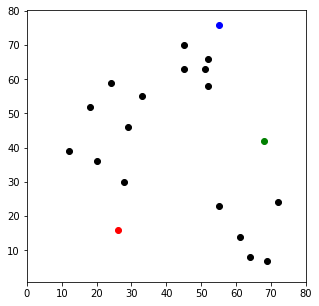

In [25]:
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color='k')
colmap={1:'r',2:'g',3:'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0.80)
plt.show()

In [28]:
def assignm(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(
            np.sqrt(
            (df['x']-centroids[i][0])**2
            +(df['y']-centroids[i][0])**2
            )
        )
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color']=df['closest'].map(lambda x:colmap[x])
    return df


In [29]:
df=assignm(df,centroids)

In [30]:
print(df.head())

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        19.104973        63.063460        45.880279        1     r
1  20  36        11.661904        57.688820        39.824616        1     r
2  28  30         4.472136        55.172457        36.796739        1     r
3  18  52        27.202941        52.497619        37.121422        1     r
4  29  46        20.223748        44.777226        27.513633        1     r


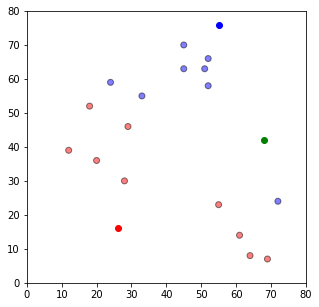

In [32]:
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolors='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()